## Pet Adoption Status Predictions

Our goal is to determine the various factors that influence pet adoption in order to predict which pets are more likely to be adopted. This dataset is imperative in finding solutions focused on increasing pet adoption rates. Therefore, using machine learning to find predictions can be an important tool in finding these solutions.


In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn as skl
import tensorflow as tf

In [2]:
# Create a path to CSV files, read the path and print DataFrame
file_path = (r"C:\Users\alexi\Desktop\Project4Group2\pet_adoption_data.csv")
pet_adoption = pd.read_csv(file_path)
pet_adoption

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [3]:
# Clean Data: Drop all of the duplicates
pet_adoption_clean = pet_adoption.drop_duplicates(subset=None, keep='first', inplace=False)
pet_adoption_clean

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [4]:
# Clean Data: Drop all of the Null Values
pet_adoption_clean = pet_adoption_clean.dropna(axis=1)
pet_adoption_clean

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [5]:
# Review Statistics
pet_adoption_clean.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [6]:
# Rename columns
pet_adoption_renamed = pet_adoption_clean.rename(columns={"PetID":"Pet_ID", "PetType":"Pet_Type","AgeMonths": "Age_in_Months", "WeightKg":"Weight_in_Kg", "HealthCondition":"Health_Condition",
                                                          "TimeInShelterDays":"Days_in_Shelter", "AdoptionFee":"Adoption_Fee", "PreviousOwner":"Previous_Owner",
                                                          "AdoptionLikelihood":"Adoption_Likelihood"})
pet_adoption_renamed

,Pet_ID,Pet_Type,Breed,Age_in_Months,Color,Size,Weight_in_Kg,Vaccinated,Health_Condition,Days_in_Shelter,Adoption_Fee,Previous_Owner,Adoption_Likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [7]:
# Export pet_adoption_renamed as a CSV file.
pet_adoption_renamed.to_csv("C:/Users/alexi/Desktop/Project4Group2/pet_adoption_renamed.csv", index=False)

## Health Condition vs. Adoption Likelihood

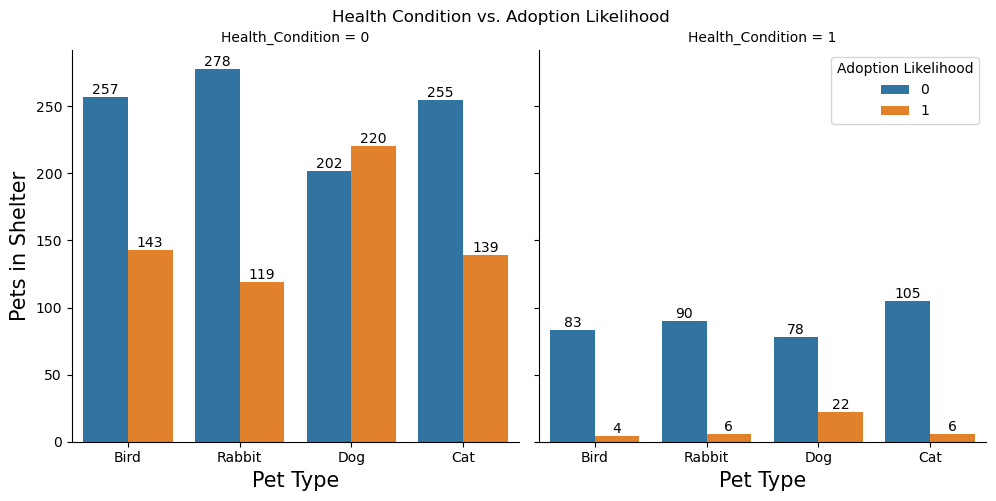

In [75]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import seaborn as sns
healthcondition = sns.catplot(
    data=pet_adoption_renamed,
    x="Pet_Type",
    kind="count",
    hue="Adoption_Likelihood",
    col="Health_Condition",
    legend_out=False,
    legend="auto"
)
for ax in healthcondition.axes.ravel():
    for i in ax.containers:
        ax.bar_label(i, label_type="edge")
        ax.set_xlabel("Pet Type", fontsize=15)
        ax.set_ylabel("Pets in Shelter", fontsize=15)
        ax.set_title("Health Condition vs. Adoption Likelihood")
        healthcondition._legend.remove()
        healthcondition.set_titles(size=10)
        healthcondition.fig.subplots_adjust(top=0.9)
        healthcondition.fig.suptitle('Health Condition vs. Adoption Likelihood')

plt.legend(title = "Adoption Likelihood",loc="best")
plt.show()

healthcondition.figure.savefig("C:/Users/alexi/Desktop/Project4Group2/Fig1.png",bbox_inches='tight')

After creating the catplot chart, we discovered that there is not much of a correlation when it comes to health condition vs. the adoption likelihood